# Groupe composé de Nicolas Toussaint et Olivier Supplisson

#### Ce notebook contient les réponses des questions 8 à 12 pour le sujet "Application de l’Algorithme EM à un mélange de Gaussiennes". Les réponses aux questions 1 à 7 sont disponibles dans le PDF joint au notebook.

###### 2A ENSAE ParisTech - Projet de statistique 1 - Janvier 2018

### Modules utilisés dans ce notebook

Ci dessous tous les modules qui seront nécessaire à l'éxécution de ce notebook. La majorité sont déjà installés de base mais certains sont à installer.

In [1]:
%matplotlib notebook
import pandas as pd # versions > 0.20.0 sinon nunique() ne marche pas sur des dataframes
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy.stats import multivariate_normal
from sklearn.cluster import k_means
from matplotlib.patches import Ellipse

## TO INSTALL
import progressbar ## $ pip install progressbar2

# Introduction

Nous allons nous interesser à l'application de l'algorithme EM sur un mélange de gaussienne.

Les cellules de ce notebook ont été codées pour être executées dans l'ordre ci-dessous. Il est donc nécessaire pour executer une cellule d'avoir executées toutes celles qui précèdent.

## Récupération des données

On commence par récupérer les données de pamplemousse et à les traduire en un dataframe de dimension (n,p).
<br>__Remarque :__ Les données doivent être dans le même dossier que ce script sous le nom "EMGaussian.data".

In [2]:
# Récupération des données via le fichier de données en un dataframe
def get_data():
    return pd.read_csv("EMGaussian.data", delimiter=" ", names=["x", "y"])

In [3]:
data = get_data()
data

,x,y
0,0.91029,0.016192
1,-2.53100,6.698100
2,4.36020,8.354100
3,-0.70489,-0.513430
4,-5.73830,-6.208800
5,-4.48190,-4.712700
6,0.90842,0.382020
7,4.42730,5.840600
8,-5.57240,3.957600
9,4.25600,-0.714650


L'échantillon contient 500 tirages de dimension 2.

## Representation des données sans classe

Pour avoir une meilleure idée de l'échantillon, nous allons représenter graphiquement tous les points sur un plan.

<IPython.core.display.Javascript object>


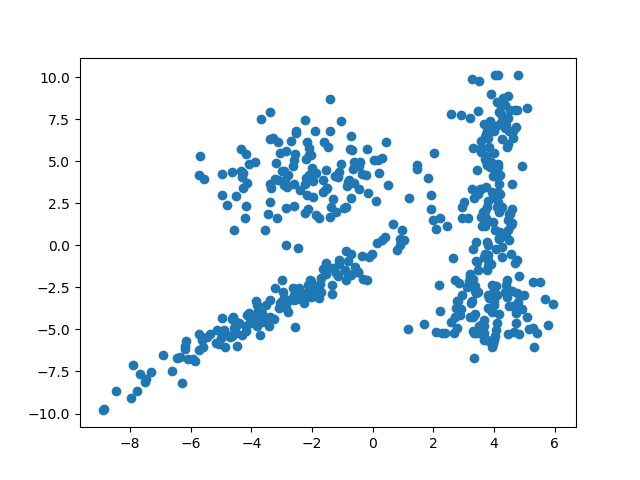

In [4]:
plt.scatter(data.x, data.y) # On affiche chaque point sur un graphe

On peut remarquer 3 grands ensembles de points. Un rond en haut à gauche. Un autre en diagonale. Enfin un vertical sur la droite

De cette première visualisation, on pourrait déduire qu'il y a trois groupes prédominants de gaussienne. Or on sait qu'il y en a 4. Il y a donc deux gausienne qui ont des répartitions assez similaires.

# Questions 8

## Utilisation de l'algoythme K-means

<IPython.core.display.Javascript object>


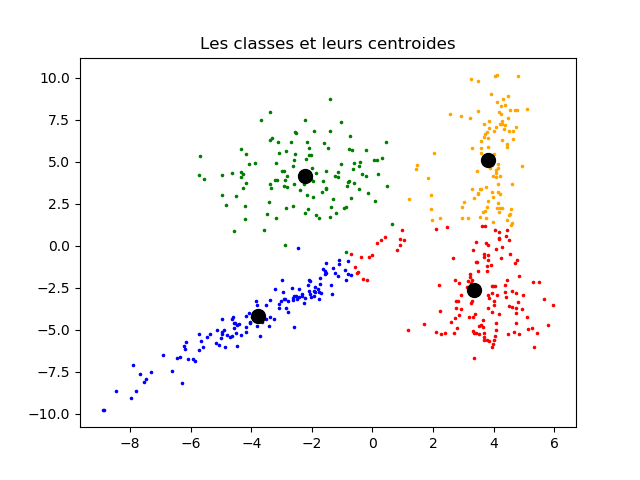

In [5]:
from sklearn.cluster import k_means

# Paramètre globale du problème
K = 4

clf = k_means(data, K) # K-means sur les données en K classes

# On rajoute une colonne aux données indiquant la classe du tirage
K_data = data.copy() # On copie le tableau pour garder uen sauvegarde des données originale
K_data["Z"] = clf[1] # On rajoute la colonne Z données par l'algorithme K-means


plt.figure()
plt.title("Les classes et leurs centroides")
colors = ["blue", "red", "orange", "green"] # Couleurs pour chaque classe

# On plot chaque classe à la fois
for i in range(K):
    data_i = K_data.loc[K_data["Z"] == i] # On récupére les données de la classe i
    
    # On plot les points de la classe i
    plt.scatter(data_i.x, data_i.y, color = colors[i], marker=".", s=10)
    
    # On plot le centroid de la classe i
    centroid = clf[0][i] # centroid i
    plt.scatter(centroid[0], centroid[1], color = "black", marker=".", s=400)

plt.show()

L'algorithme des K-means regroupe bien entre eux les points qui vont ensembles de manière assez évidente. Néanmoins, il est bien plus difficile de départager l'amas central : certains points sont associés à la classe jaune mais pourrait en fait être associés à la classe rouge, d'autres sont associés à la classe bleue mais pourraient en fait être associés à la classe rouge et enfin certains points sont associés à la classe bleue mais pourraient en fait être associés à la classe verte.

Ce graphique est néanmoins le résultat d'un seul K means. Nous allons à présent analyser la stabilité des résultats.

## Stabilité de K-means

Nous allons analyser la stabilité de l'algorithme en regardant la variance des différents centroïds obtenus.

Pour cela, on réalise d'abord n K-means. L'algorithme ne fournissant pas toujours le même centroïd i mais toujours 4 centroïds, on ne peut se contenter de trier les centroïds par leur classe i. L'éxécution d'un autre K-means sur les centroïds est donc nécessaire.

Cette autre classification, cette fois sur tous les centroïds, nous donnera les quatres classes de centroïds de toutes les classifications de données.

Il faut donc remarquer qu'il y a deux types de classifications faites. Une sur les données, réalisée n fois et une autre réalisée sur les centroïds des n classifications.

### Réalisation de n K-means

Pour tester la stabilité des résultats de la classification, nous allons effectuer cette classification n fois.

In [6]:
n = 100 # Nombre de classifications

clfs = [] # Tableau de stockage des classifications
bar = progressbar.ProgressBar() # User Interface : Barre de progression

for i in bar(range(n)):
    clfs.append(k_means(data, K)) # K-means sur les données en K classes

100% (100 of 100) |#######################| Elapsed Time: 0:00:02 Time: 0:00:02


### Analyse des classifications

Nous allons maintenant regrouper les centroïds pour ensuite effectuer une classification.

In [7]:
# Récupération de tous les centroids
centroids = []
for clf in clfs:
    centroids += list(clf[0])
    
centroids_clf = k_means(centroids, K)

Cette nouvelle classification est necessaire car chaque classification est initialisé aléatoirement. Ainsi, il est possible que deux centroïds associés à une même gaussienne ait un index différent. 

Pour regrouper correctement les centroïds entre eux, on utilise une autre classification.

#### Vérification de la cohérence

Pour que l'étude soit cohérente, il faut vérifier que chaque classification sur les données de R^2 contient bien 4 centroïds qui sont dans des classes distinctes de la classification sur les centroids.

Il est peu probable qu'une classification ait deux de ses centroïds dans la même classe de centroïd mais pour que le calcul des écarts types soit cohérent, il est nécessaire de vérifier.

In [8]:
# On commence par découper nos centroids en groupe de K 
# Les centroids sont donc regroupés par leur classification originelle.
# On a une liste des centroids de chaque classification avec leur classe de centroid.
k_centroid_by_clf = np.array(centroids_clf[1]).reshape(n,K)

# On parcours chaque classification sur les données
for k_centroid_clf in k_centroid_by_clf:
    # On parcours chaque type de classe
    for i in range(K):
        # On vérifie que la classifications ur les données avec les centroids k_centroid_clf
        # contient bien un centroid de type i
        if i not in k_centroid_clf:
            raise ValueError(str(i) + " n'est pas contenue dans une des classifications.\
            Une classification est donc incohérente.")
    # A la fin de la boucle on a vérifié que chaque i était présent dans la classification sur les données

# On a vérifié toutes les classifications sur les données sans erreur.
# Donc chaque classification contient un centroid de chaque classe de centroid.
# L'étude des écarts type est donc cohérente.
print("Chaque classification contient les " + str(K) + " classes de points.")

Chaque classification contient les 4 classes de points.


#### Plot des différentes classes de centroids

Parmis les 400 centroids, il n'y a en réalité que 12 points uniques !


<IPython.core.display.Javascript object>


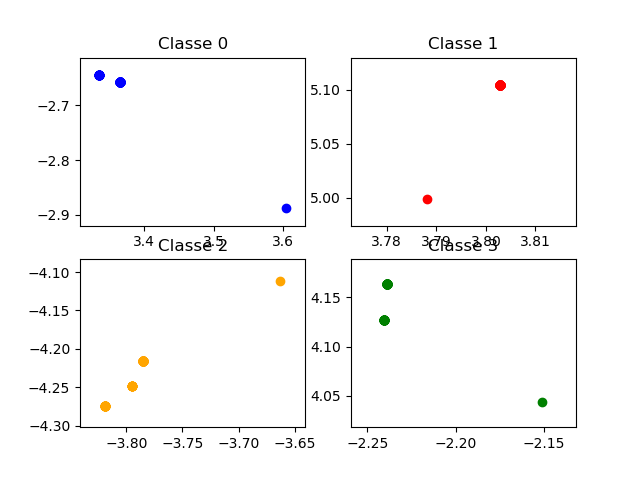

In [9]:
# On crée un dataframe des centroids avec leurs classes K
# Un dataframe nous facilite ensuite l'affichage d'écarts types, de moyennes... 
df_centroids = pd.DataFrame(centroids, columns = ["x", "y"])
df_centroids["K"] = centroids_clf[1]

# On compte le nombre de centroids différents
n_unique = df_centroids[["x", "y"]].nunique().x
print("Parmis les " + str(df_centroids.shape[0]) + " centroids, il n'y a en réalité que " + str(n_unique) + " points uniques !")

# On plot chaque classe de centroids
plt.figure()

for k in range(K):
    k_centroids = df_centroids[df_centroids["K"] == k]
    
    plt.subplot(2,ceil(K/2),k+1)
    plt.scatter(k_centroids.x, k_centroids.y, color = colors[k])
    plt.title('Classe ' + str(k))

__Remarque :__ les couleurs ne correspondent pas à celles du précédent graphique mais juste à une classe de centroïds

#### Ecarts types des classifications

In [10]:
df_centroids.groupby("K").std()

,x,y
K,,
0,0.027985,0.024072
1,0.001472,0.010562
2,0.019996,0.028658
3,0.008872,0.020456


On peut constater que l'écart type des différentes classes de centroïds est très faible. La classification est donc stable.

# Questions 9-10 : Algorithme EM

Nous allons traiter les deux questions ensemble. L'algorithme EM sera executé à l'aide d'une classe qui se veut réutilisable pour d'autres projets.

Cette classe doit permettre d'executer et d'afficher le résultat de l'algorithme EM pour des gaussiennes.

En premier lieu, nous créons la classe qui execute un EM sur des gausiennes quelconques. Puis, nous créons une autre classe qui hérite de la première mais qui surcharge la méthode associée au calcul des matrices de covariances. Cette dernière la surcharge afin de ne traiter que les matrices de covariances diagonales.

La création de cette classe rend aisée l'implémentation de nouvelles fonctionalités à l'algorithme. Par exemple, on pourrait très simplement changer l'initialisation de l'algorithme avec une autre méthode que K-means.

## Utilities

In [11]:
from scipy.stats import multivariate_normal
from sklearn.cluster import k_means
from matplotlib.patches import Ellipse
import progressbar

''''
 Cette classe permet d'éffectuer l'algorithme EM sur un mélange de K gausienne.
 Elle permet aussi l'affichage des résultats.

 Elle est divisé en quatres grandes parties :
  - Les fonctions d'itération de lalgo
  - Les fonctions E-step
  - Les fonctions M-step
  - Les fonctions d'affichages (plot...)
  
 Elle a trois fonctions publics :
  - __init__(data, K, colors)
  - run(precision) : Fait tourner l'algo em jusqu'à précision
  - show() : Affiche les résultats sur un graphe
'''

class EM_gaussian(object):
    
    # A sa création la classe reçoit les données à analyser
    # et le nombre de gausienne dans le mélange
    def __init__(self, data, K, colors = ["blue", "red", "orange", "green"]):
        # Données de type tableau numpy de forme (n,p)
        self.data = data 
        self.X = data.transpose() # Vecteur des données
        
        
        # Définition des paramètres de l'algo
        self.n, self.p = data.shape
        self.K = K
        
         # Variable d'affichage
        if (len(colors) < K):
            raise ValueError("EM_gaussien needs more color ! At least the number of gaussian.")
        self.colors = colors

        
        
    
    
#
#  FONCTIONS D'ITERATIONS DE L'ALGO EM
#

    # Fait tourner l'algorithme jusqu'à atteindre la précision demandée.
    # Retourne (P, theta)
    def run(self, precision = 2):
        epsilon = 10**(-precision)
        
        # Initialisationa avec la CLF
        P, theta = self._init_clf()
        
        # Boucle d'itérationa avec maximum 200 tours
        for i in range(200):
            P = self._E_step(theta) # E_step
            theta2 = self._M_step(P) # M_step
            
            # Calcul de la distance avec l'ancien theta calculé
            d = self._d_theta(theta, theta2)
            theta = theta2 # Le nouveau devient l'ancien
            
            # Affichage de la précision du tour
            precision_c = round(log10(d), 2)
            print("Précision : " + str(precision_c) + " (tour n°"+str(i+1)+")" + " "*20, end="\r")
            
            # Si la précision est atteinte on quitte la boucle
            if (d < epsilon):
                break
            
        # On stocke le résultat pour les fonctions d'affichages
        self.P, self.theta = P, theta
        return (P, theta)
    
    
    # Fonction de calcul de la distance entre deux itérations
    def _d_theta(self, theta1, theta2):
        d = 0
        for (M,N) in zip(theta1, theta2):
            if (isinstance(M, list)):
                d += self._d_theta(M,N)
            else:
                d+= np.linalg.norm(M-N)**2
        return d
            
    
    # Initialise l'algo avec une clf
    # Retourne P_0 et theta_0
    def _init_clf(self):
        P = self._E_step_K_means()
        theta = self._M_step(P)
        
        return (P,theta)
        
    
    
    
    
# 
#  FONCTIONS d'E step
#
        
    # Etape d'espérance effectué à l'aide d'un K-means
    # Retourne P calculé avec la classification
    def _E_step_K_means(self):
        # On effectue la classification sur les données en K classes
        clf = k_means(self.data, self.K)
        
        # On définit P selon
        # Pij = 1 si Xi est de la classe j
        #     = 0 sinon
        P = np.zeros((self.n,self.K))
        for i in range(n):
            j = clf[1][i]
            P[i][j] = 1
            
        return P
    
    
    # Etape d'espérance classique de l'algo
    # Retourne P(m+1) sachant theta(m)
    def _E_step(self, theta):
        # Recuperation des paramètres
        alphas, mu, sigmas = theta

        # Calcul de la matrice P
        P = np.zeros((self.n, self.K))
        for i in range(self.n):
            for j in range(self.K):
                d = multivariate_normal(mean = list(mu[:,j].transpose()), cov = sigmas[j])
                P[i][j] = alphas[j]*d.pdf(self.X[:,i])
            P[i,:] = P[i,:]/P[i,:].sum()
            
        return P    

    
    
 

#
#  FONCTIONS DE M-STEP
#

    # Etape de maximisation
    # Retourne theta(m+1) sachant P(m+1)
    def _M_step(self, P):
    
        # Calcul alphas
        alphas = self._M_step_alphas(P)
        
        # Calcul de P_n
        # utile pour le calcul de mu et sigmas
        P_n = np.zeros(P.shape)
        for j in range(P.shape[1]):
            P_n[:,j] = P[:,j]/P[:,j].sum()        
        
        # Calcul de mus et sigmas à l'aide P_n
        mus = self._M_step_mus(P_n)
        sigmas = self._M_step_sigmas(P_n, mus)
        
        return (alphas, mus, sigmas)
    
    
 #
 # Sous fonctions de la M-step
 #   

    # M-step pour alphas
    def _M_step_alphas(self, P):
        alphas = np.zeros(self.K)
        for k in range(self.K):
            alphas[k] = P[:,k].sum()/self.n
            
        return alphas
    
    
    # M-step pour mus
    def _M_step_mus(self, P_n):
        return np.dot(self.X, P_n)
    
    
    # M-step pour sigmas
    def _M_step_sigmas(self, P_n, mus):
        sigmas = []
        for j in range(self.K):
            s = np.zeros((self.p,self.p))
            for i in range(self.n):
                D = (self.X[:,i] - mus[:,j]).reshape((2,1))
                Ps = np.dot(D, np.transpose(D))
                s += P_n[i][j]*Ps
            sigmas.append(s)
        return sigmas
        
  


        
#
#   FONCTIONS D'AFFICHAGE
#
    
    # Affiche le graphe des points avec les moyennes et ellipsesà 80%
    def show(self):
        # Ne fonctionne que pour p = 2
        if (self.p != 2):
            raise ValueError("To be shown data must be of dimension 2  not " + str(self.p) + " !")

        # Création de la fenêtre
        fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
        
        self._show_points() # Ajoute les points
        
        self._show_thetas(ax) # Ajoute les moyennes et les ellipes

        plt.show() # Affiche la fenêtre
        
    def _show_points(self):
        # Ajout des points avec la couleur correspondant à leur gausienne
        for i in range(self.n):
            point = self.data[i] # On récupéré le point i
            z = self.P[i,:].argmax() # On prend la gausienne qui a la plus grande probabilité
            plt.scatter(point[0], point[1], color = self.colors[z], s=20) # On ajoute le point    
            
    def _show_thetas(self, ax):
        # Ajout des données sur les gaussiennes
        # Moyenne et matrice de covariance avec les elipses à 80%
        
        alphas, mus, sigmas = self.theta
        
        for k in range(self.K):
            sigma = sigmas[k]
            mu_k = mus[:,k]

            # Moyenne de la gausienne k
            plt.scatter(mu_k[0], mu_k[1], color = "black", marker=".", s=400)

            # Vecteurs propres de la matrice de covariance
            eig = np.linalg.eig(sigma)
            eigvals = eig[0]

            # Angle de l'elipse
            v = eig[1]
            a = atan(-v[0,1]/v[0,0]) 

            # Elipse à 80%
            e = Ellipse(xy=mu_k,
                        width=2*sqrt(3.219*eigvals[0]),
                        height=2*sqrt(3.219*eigvals[1]),
                        angle = degrees(a))    

            # Affichage de l'elipse
            ax.add_artist(e) # Ajout au plot
            e.set_alpha(0.25) # Ajout de la transparence à 75%
            e.set_facecolor(self.colors[k]) # Ajout de la couleur de l'elipse associé à la classe


        # Définition des bords avec une marge
        ax.set_xlim(1.2*self.data[:,0].min(), 1.2*self.data[:,0].max())
        ax.set_ylim(1.2*self.data[:,1].min(), 1.2*self.data[:,1].max())           

In [12]:
'''
    Cette classe hérite de EM_gaussian mais modifie l'étape M_step qui calcule les sigmas.
    Elle les calcule pour des gaussiennes avec des matrices de covariances diagonales.
    Simplement en mettant ne gardant que la diagonale du résultat founi par la classe parente.
'''
class EM_gaussian_diag(EM_gaussian):
    def _M_step_sigmas(self, P_n, mus):
        sigmas = super(EM_gaussian_diag, self)._M_step_sigmas(P_n, mus)
        for i, sigma in enumerate(sigmas):
            sigmas[i] = np.diag(np.diag(sigma))
        return sigmas

## Application

### Calcul pour des matrices des matrices de covariances diagonales

In [13]:
EM_diag = EM_gaussian_diag(data.values, 4)
EM_diag.run(10)

(array([[  9.98616178e-001,   8.11154576e-006,   1.37570919e-003,
           1.46307672e-009],
        [  1.00000000e+000,   2.60997498e-013,   1.53941488e-022,
           1.00817482e-042],
        [  3.45336391e-004,   2.69681387e-024,   5.22287019e-017,
           9.99654664e-001],
        ..., 
        [  9.99953039e-001,   1.79979464e-005,   2.89635184e-005,
           3.26393099e-015],
        [  1.37649704e-003,   9.98623503e-001,   6.30333448e-030,
           2.63427036e-121],
        [  9.85970131e-001,   1.40298419e-002,   2.72223421e-008,
           1.91475458e-033]]),
 (array([ 0.41069288,  0.14587302,  0.18408881,  0.25934529]),
  array([[-1.74315099, -5.04943082,  3.80781828,  3.98503793],
         [ 1.82897859, -5.49392892, -3.7700857 ,  3.85749921]]),
  [array([[  2.88360416,   0.        ],
          [  0.        ,  11.29565301]]), array([[ 2.53679956,  0.        ],
          [ 0.        ,  2.59454898]]), array([[ 0.85618908,  0.        ],
          [ 0.        ,  1.9151

<IPython.core.display.Javascript object>


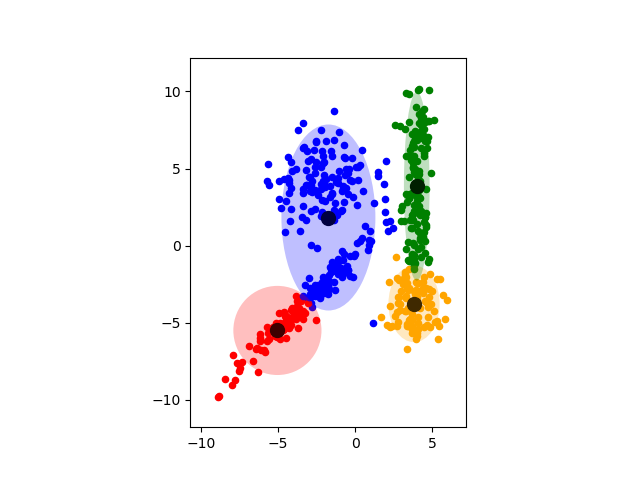

In [14]:
EM_diag.show()

On constate que les matrices de covariances diagonales ne sont pas adaptées au problème puisque l'emsemble diagonal est coupé en deux. On étudie à présent le cas général.

### Calcul pour des gaussienes général

In [15]:
EM = EM_gaussian(data.values, 4)
EM.run(10)

(array([[  3.84575850e-004,   1.15039798e-002,   9.88111444e-001,
           5.84982396e-010],
        [  2.85681277e-023,   1.00000000e+000,   2.27465909e-064,
           2.93819300e-046],
        [  1.54199054e-017,   1.06696776e-004,   3.92460506e-017,
           9.99893303e-001],
        ..., 
        [  1.53825018e-005,   2.82096712e-002,   9.71774946e-001,
           1.44636934e-015],
        [  1.59122929e-027,   2.07587445e-010,   1.00000000e+000,
           9.57313854e-123],
        [  1.52703894e-008,   5.82849436e-004,   9.99417135e-001,
           2.67704959e-034]]),
 (array([ 0.18290202,  0.25155719,  0.30555554,  0.25998525]),
  array([[ 3.80070925, -2.03436689, -3.06196032,  3.97793082],
         [-3.79729379,  4.17258602, -3.5345401 ,  3.77334168]]),
  [array([[ 0.92127767,  0.05738046],
          [ 0.05738046,  1.86586774]]), array([[ 2.90442408,  0.20655788],
          [ 0.20655788,  2.75617088]]), array([[ 6.24141112,  6.05017653],
          [ 6.05017653,  6.18245705

<IPython.core.display.Javascript object>


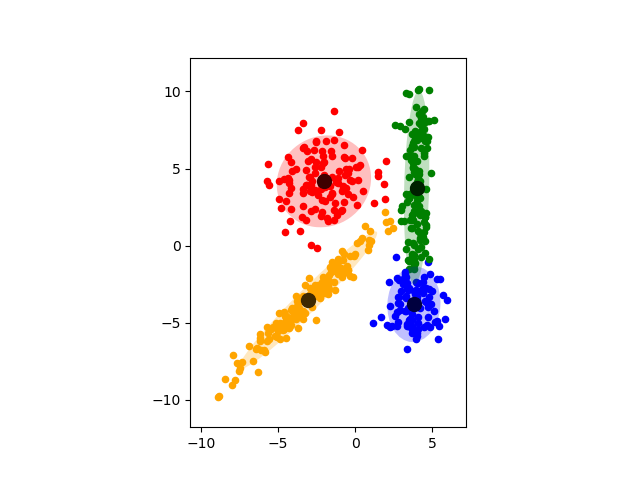

In [16]:
EM.show()

Le modéle général "fit" beaucoup mieux l'amas diagonal. 

# Questions 11

<IPython.core.display.Javascript object>


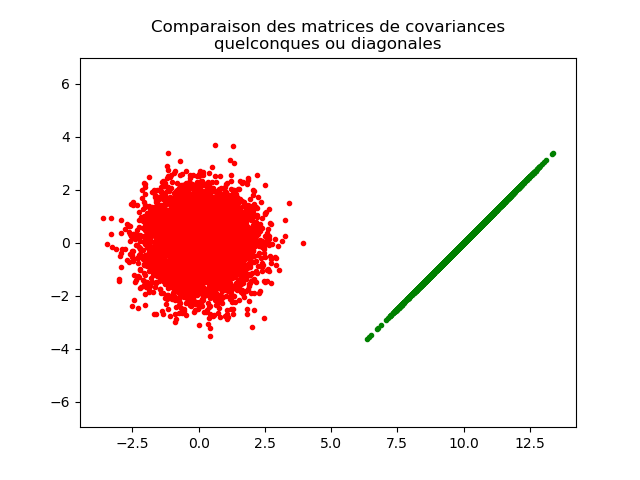

In [18]:
def plot_norm(mean, cov, color):
    x, y = np.random.multivariate_normal(mean, cov, 5000).T
    plt.plot(x, y, '.', color = color)

plt.figure()

plt.title("Comparaison des matrices de covariances\nquelconques ou diagonales")

plot_norm([0,0], np.diag([1,1]), "red") # Matrice diagonale

plot_norm([10,0], [[1,1],[1,1]], "green") # Matrice quelconque

plt.axis('equal')
plt.show()

Les matrices de covariances diagonales donnent des groupes de points qui s'étalent selon les axes du graphiques. 

*Une matrice quelconque donne des amas de points qui ne s'orientent pas selon les axes du repère. Typiquement on peut avoir une diagonale.
*Une matrice diagonale donne un nuage de point concentrique.

Dans le cas de nos données, ce résultat nous permet de remarquer que l'amas en diagonal ne pouvait pas correspondre à une matrice de variance-covariance diagonale. Le modèle diagonal n'était donc pas adapté.